In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
import SimpleITK as sitk  
#from radiomics.featureextractor import *
from sklearn import mixture
from skimage.feature import peak_local_max
from skimage import segmentation

from library_dicom.dicom_processor.tools.threshold_mask import *

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [2]:

import csv
import SimpleITK as sitk

In [3]:
#pred 2 

csv_ahl_post_process= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/pred_2/result_tmtv_sous_seg.csv'

with open(csv_ahl_post_process, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [4]:
#calcul pourcent 

for row in csv_data : 
    vol_truth = float(row[-3])
    vol_ws = float(row[-1])
    diff = (vol_ws - vol_truth) / vol_truth * 100 

    row.append(diff)

In [5]:
truth = []
sous_seg = []
pourcent = []
pred = []
cpt = 0
for row in csv_data : 
    if float(row[-3]) > float(row[-4]) : #if vol pred > vol truth
        cpt += 1 
        truth.append(float(row[-4]))
        sous_seg.append(float(row[-2]))
        pourcent.append(float(row[-1]))
        pred.append(float(row[-3]))

In [6]:
cpt #sur 1005

666

In [7]:
print(len(truth))
print(len(sous_seg))
print(len(pourcent))
print(len(pred))

666
666
666
666


10.440705879552727
82.84758239143079
-16.26821870290159
93.65291026530667


Text(0, 0.5, 'sous_seg')

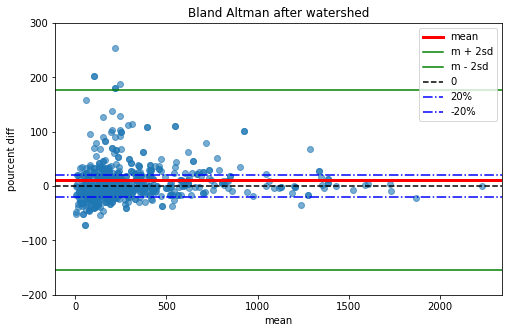

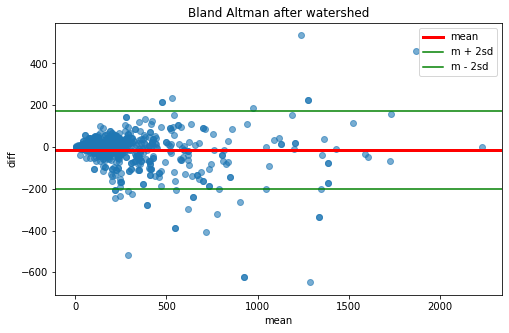

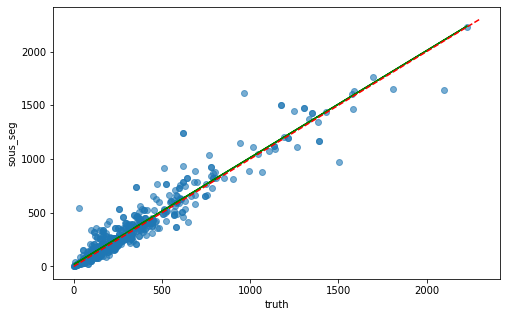

In [14]:
mean = []
diff = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))

    diff.append(truth[i] - sous_seg[i])


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(0, c='black', linestyle='--',label = '0' )
plt.axhline(20, c='blue',label = '20%', linestyle='dashdot' )
plt.axhline(-20, c='blue',label = '-20%' ,linestyle='dashdot' )
plt.scatter(mean, pourcent, alpha=0.6)
plt.ylim(-200, 300)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')





f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(diff)
sd = np.std(diff)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('diff')
plt.legend()
plt.title('Bland Altman after watershed')



from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, sous_seg)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,2300], [0,2300], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('sous_seg')


In [9]:
print(r_value)

0.9554564843877554


In [10]:
cpt = 0
for item in pourcent : 
    if item <= float(20) and item >= float(-20):
        cpt += 1

In [11]:
cpt

414

Text(0, 0.5, 'pred')

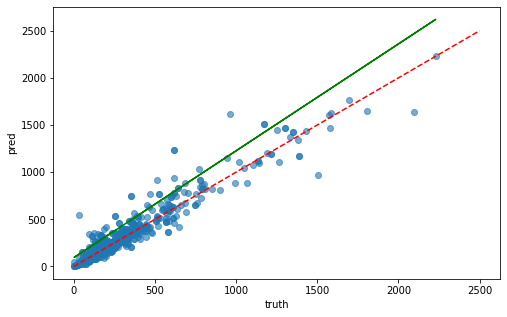

In [13]:
#reg linéaire vol pred et truth 
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, pred)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,2500], [0,2500], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('pred')

In [15]:
#pour tout le dataset 
truth = []
sous_seg = []
pourcent = []

for row in csv_data : 
    truth.append(float(row[-4]))
    sous_seg.append(float(row[-2]))
    pourcent.append(float(row[-1]))

In [16]:
print(len(truth))
print(len(sous_seg))
print(len(pourcent))

1005
1005
1005


-6.750250738353865
72.8034747163142
42.56525061366631
162.56836183631683


Text(0, 0.5, 'sous_seg')

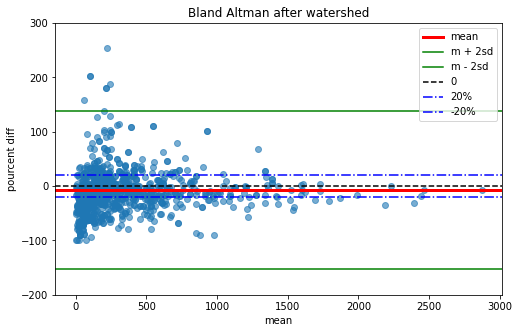

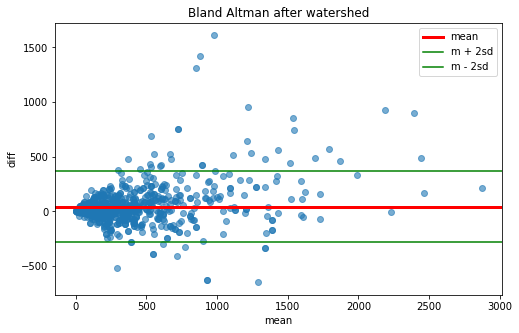

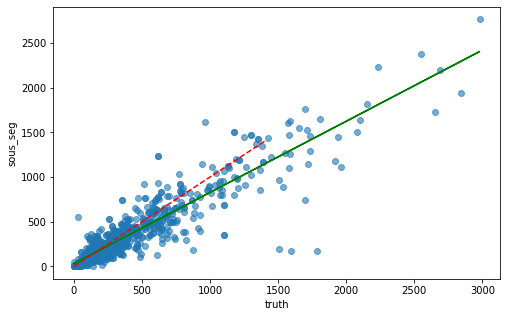

In [18]:
mean = []
diff = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))

    diff.append(truth[i] - sous_seg[i])


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(0, c='black', linestyle='--',label = '0' )
plt.axhline(20, c='blue',label = '20%', linestyle='dashdot' )
plt.axhline(-20, c='blue',label = '-20%' ,linestyle='dashdot' )
plt.scatter(mean, pourcent, alpha=0.6)
plt.ylim(-200, 300)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')





f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(diff)
sd = np.std(diff)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('diff')
plt.legend()
plt.title('Bland Altman after watershed')



from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, sous_seg)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,1400], [0,1400], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('sous_seg')


In [3]:
csv_ahl_post_process= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/ahl_tmtv_watershed_result.csv'

with open(csv_ahl_post_process, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [4]:
csv_data[0]

['13011101051022',
 '1.2.840.113619.2.290.3.2831165510.988.1366867863.298',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/mot_an_apr 25_2013.csv',
 '508.29798592676525',
 '511.7453171444504',
 '422.18805295735365',
 '16.940836940836938']

In [4]:
truth = []
sous_seg = []
pourcent = []
for row in csv_data : 
    truth.append(float(row[-4]))
    sous_seg.append(float(row[-2]))
    pourcent.append(float(row[-1]))

21.891860929352184
25.089695628307172
-18.157401297426617
73.9146277709534


Text(0, 0.5, 'sous_seg')

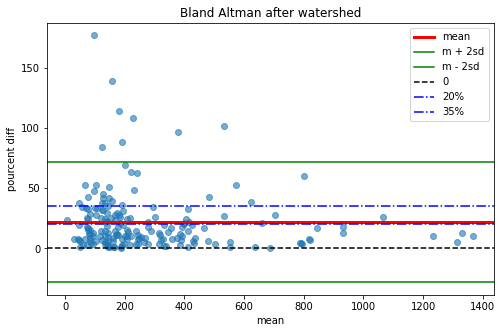

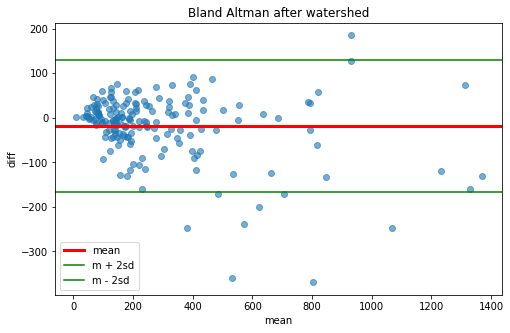

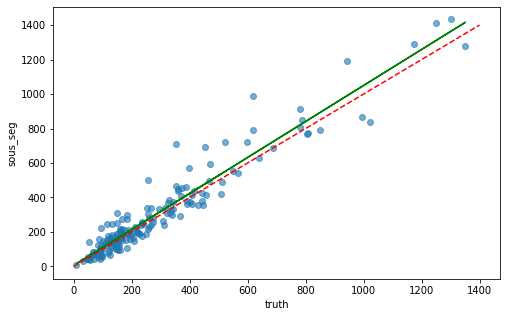

In [5]:
mean = []
diff = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))

    diff.append(truth[i] - sous_seg[i])


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(0, c='black', linestyle='--',label = '0' )
plt.axhline(20, c='blue',label = '20%', linestyle='dashdot' )
plt.axhline(35, c='blue',label = '35%' ,linestyle='dashdot' )
plt.scatter(mean, pourcent, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')





f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(diff)
sd = np.std(diff)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('diff')
plt.legend()
plt.title('Bland Altman after watershed')



from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, sous_seg)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,1400], [0,1400], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('sous_seg')

In [6]:
print(r_value)

0.962202123353695


In [ ]:
#examples

In [16]:
vol_big_diff = []
vol_pred = []
diff = []
vol_ws = []
for row in csv_data : 
    if float(row[-1]) > float(20) : 
        vol_big_diff.append(float(row[-4]))
        diff.append(float(row[-1]))
        vol_pred.append(float(row[-3]))
        vol_ws.append(float(row[-2]))
        


In [22]:
len(vol_pred)

69

In [24]:
vol_big_diff

[118.464,
 135.91286694405426,
 234.9292488099874,
 124.87866467443727,
 148.39576348126727,
 312.4660560883813,
 92.32001899275929,
 470.0799719810486,
 616.8615999238627,
 124.224,
 123.59049152764783,
 158.976,
 184.87265638259822,
 148.16189488774398,
 113.15070124430349,
 361.1385064994829,
 352.8746912400675,
 168.10921382161905,
 153.44291292334674,
 87.3649859159751,
 523.2,
 360.8451166086161,
 184.49360071853454,
 130.55314216253464,
 183.91125420362698,
 247.66996620674036,
 9.315129035021528,
 114.78879480164323,
 374.272,
 942.9829988719991,
 206.32087035323073,
 92.352,
 398.208,
 149.888,
 205.18398777008056,
 451.9034068994176,
 83.35331441247442,
 445.8303883297049,
 160.31999044418336,
 251.38623815772007,
 55.781885839377686,
 82.90709332744882,
 267.52,
 153.024,
 122.05426838131591,
 146.81719122127106,
 149.03594655857887,
 354.058249601999,
 96.53383044704077,
 122.18876344289312,
 619.7616952985845,
 167.8498368483551,
 598.5420839977451,
 132.22104415064678,
 1

diff

vol_pred

In [8]:
for i in range(len(vol_pred)) : 
    print( (abs(vol_pred[i] - vol_big_diff[i]) / vol_big_diff[i]) * 100)

90.8698001080497
73.01672962763087
27.27923286102762
64.05492730210015
123.9101274312542
13.730765092004734
291.896186440678
47.433628318584084
94.24397688869507
49.30448222565688
158.81305637982194
76.48953301127216
102.3687752355316
210.24752475247524
101.62057044079515
66.50192945636721
133.36104759925172
49.533627884143364
9.751434034416825
262.3880597014925
109.00305810397555
87.1468256656955
18.06087114999089
131.08614232209737
137.41602067183462
20.01974333662389
131.75853018372703
171.9062832800852
55.984952120383035
77.40032850530089
5.5475156777617025
91.96119196119196
85.16554162648666
34.713919726729294
61.63443543356206
120.50595238095238
49.25373134328358
48.757883191664384
98.00399201596807
101.05037930363743
70.1627486437613
125.00737245650251
50.31100478468902
10.163111668757836
129.20110192837467
5.045795170691091
17.322834645669293
216.62867996201328
18.843608498780902
72.4821133736929
61.5763935460965
262.2996794871795
57.467320261437905
173.13239644970415
19.683877

In [23]:
cpt = 0
for i in range(len(vol_ws)) : 
    if ((vol_ws[i] - vol_big_diff[i]) / vol_big_diff[i]) * 100 < 0 : 
        cpt += 1
    print( ((vol_ws[i] - vol_big_diff[i]) / vol_big_diff[i]) * 100)
cpt

50.94543490005403
24.986508364813815
-24.631458422785173
22.53634894991923
27.800134138162306
-22.339395243731836
139.08898305084745
26.99795779441798
59.93677095824703
21.895929933024217
35.03461918892186
27.657004830917884
48.37146702557199
69.42244224422443
37.899740708729475
24.791821813011982
32.966119309914774
30.706921944035354
-37.348629700446146
84.22885572139303
38.28746177370029
20.895724642590963
-41.49808638600327
39.02621722846442
62.37726098191215
-25.024679170779862
-23.62204724409449
114.27050053248135
22.21272229822162
26.131103479169777
-29.618909792571145
33.95703395703396
42.767598842815815
23.654995730145167
-20.77354959451029
53.01339285714285
-33.642597821702296
-20.444200712914725
36.28742514970059
34.37074499124684
-37.7335744424352
52.934237687997644
26.363636363636374
-24.257632789627774
29.0909090909091
-31.89009159034138
-31.496062992125985
101.29154795821465
-28.317659352142115
-27.793065492570175
27.444869620103358
63.48157051282052
20.81699346405229
88.

24

In [9]:
#plus grosse diff associé à son volume truth : 

for i in range(len(vol_big_diff)):
    if diff[i] > 50 : 
        print("volume truth : {}, différence : {}".format(vol_big_diff[i], diff[i]))

volume truth : 118.464, différence : 50.94543490005403
volume truth : 92.32001899275929, différence : 139.08898305084745
volume truth : 616.8615999238627, différence : 59.93677095824703
volume truth : 148.16189488774398, différence : 69.42244224422443
volume truth : 87.3649859159751, différence : 84.22885572139303
volume truth : 183.91125420362698, différence : 62.37726098191215
volume truth : 114.78879480164323, différence : 114.27050053248135
volume truth : 451.9034068994176, différence : 53.01339285714285
volume truth : 82.90709332744882, différence : 52.934237687997644
volume truth : 354.058249601999, différence : 101.29154795821465
volume truth : 167.8498368483551, différence : 63.48157051282052
volume truth : 132.22104415064678, différence : 88.36908284023669
volume truth : 255.488, différence : 97.11923847695391
volume truth : 89.14705776799251, différence : 52.80351048269137
volume truth : 52.083212595773645, différence : 177.0174306003874
volume truth : 148.78516186978592, dif

In [10]:
print("diff sup à 20% :", len(vol_big_diff))
cpt = 0
for item in vol_big_diff : 
    if item < 200 : 
        cpt += 1

cpt 

diff sup à 20% : 69


47

In [14]:
sorted(vol_big_diff)

[9.315129035021528,
 52.083212595773645,
 55.781885839377686,
 66.40693665374626,
 69.6800990808697,
 82.90709332744882,
 83.35331441247442,
 86.08548381183937,
 87.3649859159751,
 89.14705776799251,
 92.32001899275929,
 92.352,
 93.61582434408774,
 96.53383044704077,
 99.07980050006812,
 102.5524844526208,
 106.5052825937164,
 113.15070124430349,
 114.78879480164323,
 118.464,
 118.822905801062,
 122.05426838131591,
 122.18876344289312,
 123.59049152764783,
 124.224,
 124.87866467443727,
 126.47549212117156,
 130.55314216253464,
 132.22104415064678,
 135.91286694405426,
 146.81719122127106,
 148.16189488774398,
 148.39576348126727,
 148.78516186978592,
 149.03594655857887,
 149.888,
 153.024,
 153.44291292334674,
 158.976,
 159.54379097023403,
 160.31999044418336,
 162.26829179290098,
 167.8498368483551,
 168.10921382161905,
 183.91125420362698,
 184.49360071853454,
 184.87265638259822,
 205.18398777008056,
 206.32087035323073,
 234.9292488099874,
 247.66996620674036,
 251.38623815772

In [15]:
cpt = 0
for row in csv_data : 
    if float(row[-4]) < 200 : 
        cpt += 1

cpt

99

In [ ]:
#mip watershed 

#index = 176 (petit volume truth 52, vol ws 144, vol pred 528, big diff 177)
#= 14 big volume, diff 60, vol ws = 1000, vol truth = 616, vol_pred = 1200
# = 74 volume 114 mais diff 114

In [26]:
csv_data[74]

['13011101331014',
 '1.2.840.113619.2.290.3.279748722.307.1382335965.595',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.279748722.307.1382335965.595_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113619.2.290.3.279748722.307.1382335965.595_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.279748722.307.1382335965.595_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/bar_ju_oct 21_2013.csv',
 '114.78879480164323',
 '312.11794556715176',
 '245.9585251766839',
 '114.27050053248135']

In [4]:
data = []
for row in csv_data : 
    if float(row[-1]) > float(20) : 
        data.append(row)


In [5]:
len(data)

69

In [14]:
serie = data[0]
print(serie)
folder = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/example'

['13011101021014', '1.2.840.113704.1.111.4268.1351517946.9', '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113704.1.111.4268.1351517946.9_nifti_PT.nii', '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113704.1.111.4268.1351517946.9_mask_pred_float.nii', '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113704.1.111.4268.1351517946.9_nifti_mask.nii', '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/zou_ab_oct 29_2012_SK.csv', '118.464', '226.112', '178.816', '50.94543490005403']


In [16]:
model = WatershedModel(serie[3], serie[2], type = '3d')
ws_array, label_number = model.watershed_model(0.5)
ws_array = get_threshold_matrix(ws_array, model.pet_array, label_number, 0.41)
mask_filename = mip_projection(ws_array, 0, folder, serie[1], type='mask', cmap='viridis', vmin=None, vmax=None)
pet_filename = mip_projection(model.pet_array, 0, folder, serie[1], type='pet', cmap='Greys', vmin=2, vmax = 8)


img = sitk.ReadImage(serie[4])
array = sitk.GetArrayFromImage(img).transpose()
if len(array.shape) != 3 : 
    number_roi = array.shape[3]
else : number_roi = 1
    
array = get_threshold_matrix_4D(array, model.pet_array, 0.41)
print(model.pet_spacing)
sum_array = np.sum(array, axis = -1)
print(len(np.where(sum_array != 0)[0]))
mip_projection_4D(array, 0, folder, serie[1], number_roi, cmap='viridis', borne_max=None)

(4.0, 4.0, 4.0)
1851
taille mask :  (144, 144, 255, 10)


'/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/example/1.2.840.113704.1.111.4268.1351517946.9mip_MASK_0.png'

In [17]:
mip_directory = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/example'

for serie in data : 
    print(data.index(serie))
    try : 
        model = WatershedModel(serie[3], serie[2], type = '3d')
        ws_array, label_number = model.watershed_model(0.5)
        folder = mip_directory+'/'+serie[0]
        if not os.path.exists(folder):
            os.makedirs(folder)

        #sans seuil 
        mask_filename_sans_seuil = mip_projection(ws_array, 0, folder, serie[1]+'_sans_seuil', type='mask', cmap='viridis', vmin=None, vmax=None)

        #avec seuil 
        ws_array = get_threshold_matrix(ws_array, model.pet_array, label_number, 0.41)
        mask_filename = mip_projection(ws_array, 0, folder, serie[1], type='mask', cmap='viridis', vmin=None, vmax=None)
        #pet
        pet_filename = mip_projection(model.pet_array, 0, folder, serie[1], type='pet', cmap='Greys', vmin=2, vmax = 8)


        #vérité de terrain avec seuil
        img = sitk.ReadImage(serie[4])
        array = sitk.GetArrayFromImage(img).transpose()
        if len(array.shape) != 3 : 
            number_roi = array.shape[3]
        else : number_roi = 1
        array = get_threshold_matrix_4D(array, model.pet_array, 0.41)

        mip_projection_4D(array, 0, folder, serie[1], number_roi, cmap='viridis', borne_max=None)

    except Exception as err : 
        print(err )

0
taille mask :  (144, 144, 255, 10)
1
taille mask :  (256, 256, 299, 8)
2
taille mask :  (200, 200, 419, 46)
3
taille mask :  (200, 200, 543, 10)
4
taille mask :  (200, 200, 353, 28)
5
taille mask :  (168, 168, 405, 48)
6
taille mask :  (256, 256, 263, 4)
7
taille mask :  (144, 144, 255, 24)
8
taille mask :  (200, 200, 481, 57)
9
taille mask :  (144, 144, 276, 10)
10
taille mask :  (192, 192, 299, 4)
11
taille mask :  (144, 144, 234, 11)
12
taille mask :  (200, 200, 353, 28)
13
taille mask :  (256, 256, 299, 13)
14
taille mask :  (192, 192, 299, 8)
15
taille mask :  (256, 256, 227, 16)
16
taille mask :  (256, 256, 335, 17)
17
taille mask :  (168, 168, 390, 6)
18
taille mask :  (128, 128, 327, 40)
19
taille mask :  (192, 192, 299, 12)
20
taille mask :  (169, 169, 255, 42)
21
taille mask :  (256, 256, 299, 13)
22
taille mask :  (200, 200, 481, 60)
23
taille mask :  (128, 128, 299, 18)
24
taille mask :  (128, 128, 263, 7)
25
taille mask :  (256, 256, 299, 27)
26
taille mask :  (256, 256,

In [36]:
from library_dicom.dicom_processor.tools.threshold_mask import *
img = sitk.ReadImage(serie[4])
array = sitk.GetArrayFromImage(img).transpose()
print(array.shape)

(256, 256, 371, 13)


In [37]:
array = get_threshold_matrix_4D(array, model.pet_array, 0.41)

mip_projection_4D(array, 0, '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/example', serie[1], 13, cmap='viridis', borne_max=None)

taille mask :  (256, 256, 371, 13)


'/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/example/1.2.840.113619.2.290.3.279748722.307.1382335965.595mip_MASK_0.png'